In [1]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import h5py
import numpy as np
import io_utils #custom wrapper for pytables

In [2]:
# Download the data file that we need to run these examples
import os
outputfilepath='20190510.003_lp_3min-fitcal.h5'
if not os.path.exists(outputfilepath):
    import urllib.request
    url='https://data.amisr.com/database/dbase_site_media/PFISR/Experiments/20190510.003/DataFiles/20190510.003_lp_3min-fitcal.h5'

    print('Downloading data file...')
    urllib.request.urlretrieve(url,outputfilepath)

    print('...Done!')

In [3]:
f=io_utils.read_whole_h5file(outputfilepath)

In [4]:
f['/']['BeamCodes'] #beamcode, azimuth, elevation, ksys

array([[ 6.31970000e+04, -3.50900002e+01,  6.61900024e+01,
         8.48000000e-20],
       [ 6.32390000e+04, -1.62299995e+01,  5.86800003e+01,
         8.19000000e-20],
       [ 6.32810000e+04, -2.95000005e+00,  4.75499992e+01,
         5.78000000e-20],
       [ 6.33650000e+04,  7.60899963e+01,  6.61900024e+01,
         7.75000000e-20],
       [ 6.34010000e+04,  5.72299995e+01,  5.86800003e+01,
         7.49000000e-20],
       [ 6.34490000e+04,  4.39500008e+01,  4.75499992e+01,
         5.23000000e-20],
       [ 6.40160000e+04,  1.40400000e+01,  9.00000000e+01,
         8.88000000e-20],
       [ 6.40370000e+04,  2.05000000e+01,  7.60000000e+01,
         8.83000000e-20],
       [ 6.40550000e+04,  2.05000000e+01,  6.40000000e+01,
         9.47000000e-20],
       [ 6.40790000e+04,  2.05000000e+01,  5.00000000e+01,
         6.87000000e-20],
       [ 6.41570000e+04, -1.54300003e+02,  7.75000000e+01,
         5.53000000e-20]])

In [5]:
#find east and west beams
be=np.argmin(76.09-np.abs(f['/']['BeamCodes'][:,1]))

bw=np.argmin(np.abs(-35.09-f['/']['BeamCodes'][:,1]))

print(be,bw)

10 0


In [6]:
#Time x Beam x Altitude x Ions (-1 for electrons) x Parameter (fraction, temperature, collision freq, velocity)
print(f['/FittedParams']['Fits'].shape)

(1055, 11, 18, 6, 4)


In [12]:
times=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in f['/Time']['UnixTime'][:,0]]
alts=f['/FittedParams']['Altitude']*1e-3 #convert meters to km
Ne=f['/FittedParams']['Ne']
Te=f['/FittedParams']['Fits'][:,:,:,-1,1]
Ti=f['/FittedParams']['Fits'][:,:,:,0,1]
Vo=f['/FittedParams']['Fits'][:,:,:,0,-1]

Text(0.5, 0.98, 'Long Pulse Data on 2019-05-11')

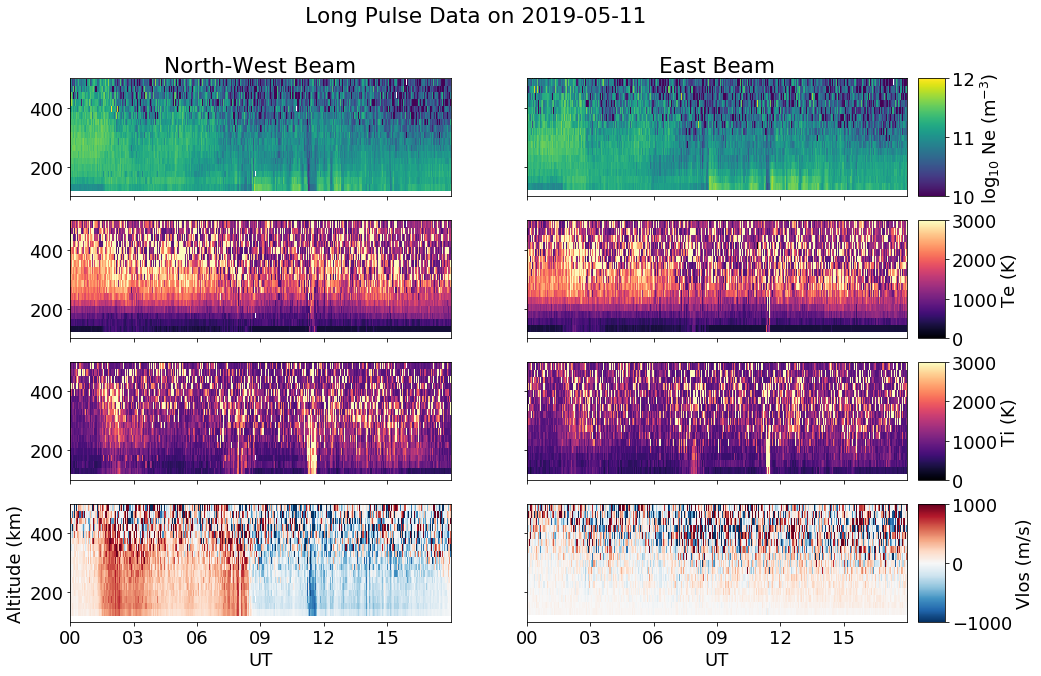

In [13]:
plt.rcParams['figure.figsize']=15,10
plt.rcParams['font.size']=18
fig,axarr=plt.subplots(4,2,sharex=True,sharey=True)

neclrs = axarr[0,0].pcolormesh(mdates.date2num(times),alts[bw,:],np.log10(Ne[:,bw,:]).T,vmin=10,vmax=12,cmap='viridis',shading='nearest')
axarr[0,0].set_ylim([100,500])

teclrs = axarr[1,0].pcolormesh(mdates.date2num(times),alts[bw,:],Te[:,bw,:].T,vmin=0,vmax=3000,cmap='magma',shading='nearest')
axarr[1,0].set_ylim([100,500])

ticlrs = axarr[2,0].pcolormesh(mdates.date2num(times),alts[bw,:],Ti[:,bw,:].T,vmin=0,vmax=3000,cmap='magma',shading='nearest')
axarr[2,0].set_ylim([100,500])

voclrs = axarr[3,0].pcolormesh(mdates.date2num(times),alts[bw,:],Vo[:,bw,:].T,vmin=-1000,vmax=1000,cmap='RdBu_r',shading='nearest')
axarr[3,0].set_ylim([100,500])

axarr[0,0].set_title('North-West Beam')

neclrs = axarr[0,1].pcolormesh(mdates.date2num(times),alts[be,:],np.log10(Ne[:,be,:]).T,vmin=10,vmax=12,cmap='viridis',shading='nearest')
axarr[0,1].set_ylim([100,500])

teclrs = axarr[1,1].pcolormesh(mdates.date2num(times),alts[be,:],Te[:,be,:].T,vmin=0,vmax=3000,cmap='magma',shading='nearest')
axarr[1,1].set_ylim([100,500])

ticlrs = axarr[2,1].pcolormesh(mdates.date2num(times),alts[be,:],Ti[:,be,:].T,vmin=0,vmax=3000,cmap='magma',shading='nearest')
axarr[2,1].set_ylim([100,500])

voclrs = axarr[3,1].pcolormesh(mdates.date2num(times),alts[be,:],Vo[:,be,:].T,vmin=-1000,vmax=1000,cmap='RdBu_r',shading='nearest')
axarr[3,1].set_ylim([100,500])

axarr[0,1].set_title('East Beam')

axarr[-1,0].set_xlim([mdates.date2num(datetime.datetime(2019,5,11,0,0,0)),mdates.date2num(datetime.datetime(2019,5,11,18,0,0))])
axarr[-1,0].set_xticks(np.arange(mdates.date2num(datetime.datetime(2019,5,11,0,0,0)),mdates.date2num(datetime.datetime(2019,5,11,18,0,0)),3.00001/24.0))


axarr[-1,0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1,0].set_xlabel('UT')
axarr[-1,1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1,1].set_xlabel('UT')
axarr[-1,0].set_ylabel('Altitude (km)')
#axarr[0].set_title('Alternating Code Temperatures on 2011-08-04')


box=axarr[0,1].get_position()
necbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
necb=plt.colorbar(neclrs,cax=necbarax)
necb.set_label('log$_{10}$ Ne (m$^{-3}$)')

box=axarr[1,1].get_position()
tecbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
tecb=plt.colorbar(teclrs,cax=tecbarax)
tecb.set_label('Te (K)')

box=axarr[2,1].get_position()
ticbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
ticb=plt.colorbar(ticlrs,cax=ticbarax)
ticb.set_label('Ti (K)')

box=axarr[3,1].get_position()
vocbarax=fig.add_axes([box.x0+box.width+0.01, box.y0, 0.025, box.height])
vocb=plt.colorbar(voclrs,cax=vocbarax)
vocb.set_label('Vlos (m/s)')

fig.suptitle('Long Pulse Data on 2019-05-11')
